# Homework 6 - Women and children first?!

The objective of this homework is to practice simple decision trees. To successfully complete this homework, you may use any resources available to you. 

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column that specifies whether the person is a child (age <= 10)
    * Group the data by `sex`, `child`, `pclass` and interpret the survival rate.
2. Develop a decision tree with depth of 1.
    * Preprocess the `sex` column using LabelEncoder
    * Develop the decision tree
    * Visually reproduce the decision tree using a seaborn barchart.
    * Use the t-test from scipy.stats to statistically reproduce the decision.
    * Interpret the decision tree.
3. Develop a decision tree with depth of 2.
    * Develop the decision tree
    * Visually reproduce the decision tree using seaborn barcharts (left side and right side)
    * Use the ranksums test from scipy.stats to statistically reproduce the decisions.
    * Interpret the decision tree. 
    
Hints:
* Explain what you are doing.
* Use references.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm
import pydotplus as pydot

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
tc = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv")

In [7]:
tc.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
tc.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| |
|`parch`| The number of parents or childen that are also traveling on the Titanic| |
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

Creating new dataset with columns useful for our analysis:

Many rows contain NaN in the column age.As age does not determine the survival rate,we can either remove it or replace the NaN values with some values.But removing the NaN will decrement the count.Therefore,let's replace with mean

In [9]:
tc['age'].fillna((tc['age'].mean()), inplace=True)
tc.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Women and children first?

### Create a column that specifies whether the person is a child (10 years or younger)


In [10]:
tc['child'] = np.where(tc['age']<=10, '1.0', '0.0')
tc.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,child
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0.0
1309,NaN,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

Notice,row 1309 has NaN values in all the columns,let's drop it:

In [11]:
tc = tc.drop(tc.index[1309])

In [12]:
tc.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,child
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,0.0
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0.0


### Group the data by `sex`, `child`, `pclass` and interpret the survival rate.

In [13]:
grp_total = tc.groupby('sex')['sex'].count()
cx = tc.groupby(['pclass','sex','child'])['survived'].size().to_frame().reset_index()
surv_rate = ((cx.groupby(['sex','pclass','child'])['survived'].sum()/grp_total)*100).to_frame()
surv_rate

0
sex    pclass child           
female 1.0    0.0    30.686695
              1.0     0.214592
       2.0    0.0    20.386266
              1.0     2.360515
       3.0    0.0    40.128755
              1.0     6.223176
male   1.0    0.0    20.877817
              1.0     0.355872
       2.0    0.0    18.979834
              1.0     1.304864
       3.0    0.0    54.804270
              1.0     3.677343

<b>Interpretation of Survival rate(column with name 0) :</b>
<n></n>
Class 1 - Adult female survival rate: 31% ;
          Children female survival rate : 0.2% ;
          Adult male survival rate: 21% ;
          Children male survival rate : 0.35%
<n></n>
Class 2 - Adult female survival rate: 20.4% ;
          Children female survival rate : 2.3% ;
          Adult male survival rate: 19% ;
          Children male survival rate : 1.3%
<n></n>
Class 3 - Adult female survival rate: 40.1% ;
          Children female survival rate : 6.2% ;
          Adult male survival rate: 55% ;
          Children male survival rate : 3.7%

## Decision Tree with depth of 1

Develop a decision tree with depth of 1.
Preprocess the sex column using LabelEncoder
Develop the decision tree
Visually reproduce the decision tree using a seaborn barchart.
Use the t-test from scipy.stats to statistically reproduce the decision.
Interpret the decision tree.

### Restrict your analysis on the relevant columns (check table above).

In [14]:
cb = tc.copy()
cb.drop(['sibsp','parch','name','ticket','fare','cabin','embarked','boat','body','home.dest'],axis = 1,inplace = True)
cb.head()

,pclass,survived,sex,age,child
0,1.0,1.0,female,29.0000,0.0
1,1.0,1.0,male,0.9167,1.0
2,1.0,0.0,female,2.0000,1.0
3,1.0,0.0,male,30.0000,0.0
4,1.0,0.0,female,25.0000,0.0


### Preprocess the `sex` column

In [15]:
cb['sex'] = cb['sex'].map({'female': '0', 'male': '1'})
cb.head()

,pclass,survived,sex,age,child
0,1.0,1.0,0,29.0000,0.0
1,1.0,1.0,1,0.9167,1.0
2,1.0,0.0,0,2.0000,1.0
3,1.0,0.0,1,30.0000,0.0
4,1.0,0.0,0,25.0000,0.0


In [16]:
le_sex = pp.LabelEncoder()
y = le_sex.fit_transform(cb['sex'].astype(str))
y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

### Build the decision tree

**Build** and **visualize** a decision tree with depth of 1 (i.e., one root and two leaf nodes) to find differences between passengers who survived and those who did not. 

In [17]:
X = cb.drop('sex',axis=1)

In [18]:
import sklearn.model_selection as ms

In [19]:
dt1 = tree.DecisionTreeClassifier(max_depth=1).fit(X,y)

In [20]:
def visualize_classifier(model, X, y):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    
    model.fit(X, y)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    def plot_boundaries(i, xlim, ylim):
    
        if i >= 0:
            tree = model.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],[xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],[tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,[ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,[tree.threshold[i], ylim[1]])
            
    plot_boundaries(0, xlim,ylim)

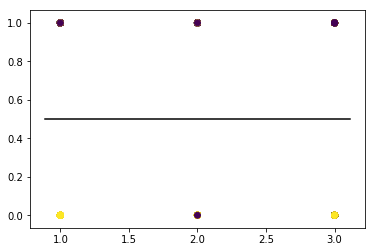

In [90]:
visualize_classifier(dt1, X, y)

In [27]:
!pip install graphviz


You need to adapt the `XXX` in the following code to visualize the decision tree.

In [44]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

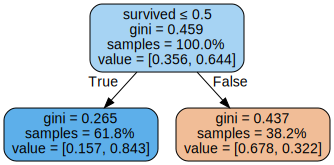

In [45]:
import graphviz
dot_data = tree.export_graphviz(dt1, out_file=None, 
                         feature_names=list(X.columns),  
                         #class_names = [dt1 if i == 1 else dt1 for i in dt.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

### Visually reproduce the decision tree using a seaborn factorplot.


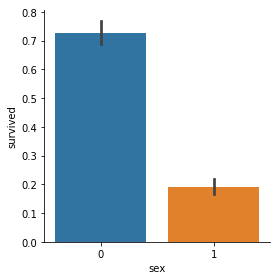

In [51]:
sns.factorplot(x='sex', data=cb, y='survived',aspect=1,kind='bar');   # 0 :Male;1:Female

### Use the t-test from `scipy.stats` to statistically reproduce the decision.

In [ ]:
from scipy.stats import ttest_ind


## Develop a decision tree with depth of 2

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [22]:
dt2 = tree.DecisionTreeClassifier(max_depth=2)

In [23]:
X1 = cb.drop('survived',axis=1)

In [24]:
Y1 = cb.survived

In [25]:
dt2.fit(X1,Y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
def visualize_classifier(model, X, y):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    
    model.fit(X, y)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    def plot_boundaries(i, xlim, ylim):
    
        if i >= 0:
            tree = model.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],[xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],[tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,[ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,[tree.threshold[i], ylim[1]])
            
    plot_boundaries(0, xlim,ylim)

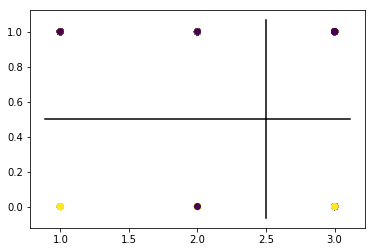

In [41]:
visualize_classifier(dt2, X, y)

You need to adapt the `XXX` in the following code to visualize the decision tree.

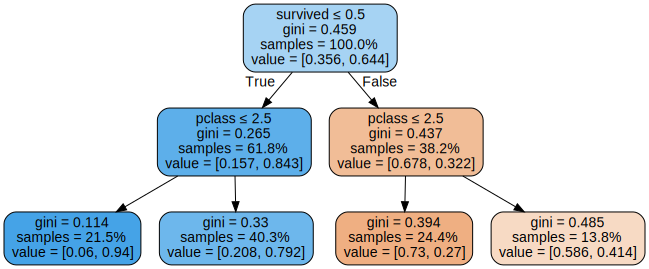

In [52]:
import graphviz
dot_data = tree.export_graphviz(dt2, out_file=None, 
                         feature_names=list(X.columns),  
                         #class_names = [dt2 if i == 1 else dt2 for i in dt2.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

###  Visually reproduce the left side of the decision tree using seaborn barcharts

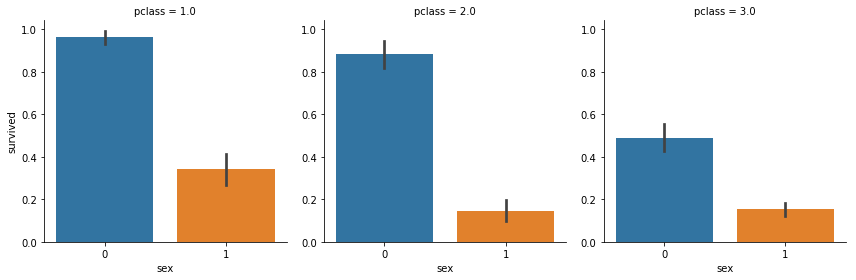

In [98]:
sns.factorplot(x='sex', data=cb, y='survived',col = 'pclass' ,aspect=1,kind='bar');   # 0 :Male;1:Female

### Use the ranksums test from scipy.stats to statistically reproduce the decision on the left side.


In [ ]:
from scipy.stats import f_oneway, ranksums


###  Visually reproduce the right side of the decision tree using seaborn barcharts

### Use the ranksums test from scipy.stats to statistically reproduce the decisions on the right side.
